In [29]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict

In [30]:
load_dotenv()

True

In [31]:
model=ChatOpenAI(model="openai/gpt-4.1-nano",base_url="https://openrouter.ai/api/v1")

In [32]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [33]:
graph=StateGraph(JokeState)

In [34]:
checkpointer=InMemorySaver()

In [35]:
def gen_joke(state:JokeState)->dict:
    topic:str=state["topic"]
    prompt:str=f"""
    You are a world class comedian you are standing on the stage
     and you have to deliver a joke on the topic: {topic}        
 """
    joke=model.invoke(prompt).content

    return{"joke":joke}


In [36]:
def exp_joke(state:JokeState)->dict:

    joke=state['joke']

    prompt=f"""
        decode the meaning of this joke:'{joke}'
        ,and explain it.
"""
    explanation=model.invoke(prompt)

    return{"explanation":explanation.content}

In [37]:
graph.add_node("gen_joke",gen_joke)
graph.add_node("exp_joke",exp_joke)

In [38]:
graph.add_edge(START,"gen_joke")
graph.add_edge("gen_joke","exp_joke")
graph.add_edge("exp_joke",END)

In [39]:
workflow=graph.compile(checkpointer=checkpointer)

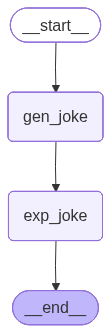

In [40]:
workflow

In [41]:
config1={"configurable":{"thread_id":"1"}}
workflow.invoke({"topic":"cricket"},config=config1)

{'topic': 'cricket',
 'joke': 'Alright folks, you know you\'re truly passionate about cricket when you start arguing with your TV during a match — even though the players can\'t hear you! I told my friend, "Watch out, that umpire\'s blind," and he said, "No, he\'s just been blinded by your commentary." Guess even in cricket, the real game is between your voice and the silence of the scoreboard!',
 'explanation': 'This joke plays on the humorous idea that cricket fans can become so engrossed in the game that they start verbally criticizing or commenting on it as if their comments could influence the players or the game itself, even though the players can\'t hear them. \n\nSpecifically, the joke involves a humorous exchange between the speaker and a friend about the umpire\'s eyesight. The speaker warns about the umpire being "blind," implying unfairness or poor judgment. The friend retorts, "No, he\'s just been blinded by your commentary," suggesting that the fan\'s loud and perhaps bia

In [42]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'cricket', 'joke': 'Alright folks, you know you\'re truly passionate about cricket when you start arguing with your TV during a match — even though the players can\'t hear you! I told my friend, "Watch out, that umpire\'s blind," and he said, "No, he\'s just been blinded by your commentary." Guess even in cricket, the real game is between your voice and the silence of the scoreboard!', 'explanation': 'This joke plays on the humorous idea that cricket fans can become so engrossed in the game that they start verbally criticizing or commenting on it as if their comments could influence the players or the game itself, even though the players can\'t hear them. \n\nSpecifically, the joke involves a humorous exchange between the speaker and a friend about the umpire\'s eyesight. The speaker warns about the umpire being "blind," implying unfairness or poor judgment. The friend retorts, "No, he\'s just been blinded by your commentary," suggesting that the fan\'s l

In [43]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'cricket', 'joke': 'Alright folks, you know you\'re truly passionate about cricket when you start arguing with your TV during a match — even though the players can\'t hear you! I told my friend, "Watch out, that umpire\'s blind," and he said, "No, he\'s just been blinded by your commentary." Guess even in cricket, the real game is between your voice and the silence of the scoreboard!', 'explanation': 'This joke plays on the humorous idea that cricket fans can become so engrossed in the game that they start verbally criticizing or commenting on it as if their comments could influence the players or the game itself, even though the players can\'t hear them. \n\nSpecifically, the joke involves a humorous exchange between the speaker and a friend about the umpire\'s eyesight. The speaker warns about the umpire being "blind," implying unfairness or poor judgment. The friend retorts, "No, he\'s just been blinded by your commentary," suggesting that the fan\'s 